<a href="https://colab.research.google.com/github/bisd98/PycharmProjects/blob/master/Data_Analysis_for_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving general.csv to general.csv
Saving prenatal.csv to prenatal.csv
Saving sports.csv to sports.csv


In [ ]:
import pandas as pd

In [ ]:
general = pd.read_csv('general.csv')
prenatal = pd.read_csv('prenatal.csv')
sports = pd.read_csv('sports.csv')

In [ ]:
pd.set_option('display.max_columns', 20)

In [ ]:
prenatal.rename(columns={'HOSPITAL': 'hospital', 'Sex': 'gender'}, inplace=True)

In [ ]:
sports.rename(columns={'Hospital': 'hospital', 'Male/female': 'gender'}, inplace=True)

In [ ]:
prenatal.gender.fillna('f', inplace=True)

In [ ]:
sports.gender.replace(to_replace=['female', 'male'], value=['f', 'm'], inplace=True)

In [ ]:
general.gender.replace(to_replace=['woman', 'man'], value=['f', 'm'], inplace=True)

In [ ]:
merged_data = pd.concat([general, prenatal, sports], ignore_index=True)

In [ ]:
merged_data.drop('Unnamed: 0', axis=1 ,inplace=True)

In [ ]:
merged_data

,hospital,gender,age,height,...,mri,xray,children,months
0,general,m,33.0,1.640,...,NaN,NaN,NaN,NaN
1,general,m,48.0,1.930,...,NaN,NaN,NaN,NaN
2,general,f,23.0,1.540,...,NaN,NaN,NaN,NaN
3,general,m,27.0,1.940,...,NaN,NaN,NaN,NaN
4,general,f,22.0,1.760,...,NaN,f,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,...,f,t,NaN,NaN
1002,sports,m,20.0,5.400,...,t,f,NaN,NaN
1003,sports,m,17.0,6.089,...,f,f,NaN,NaN
1004,sports,f,16.0,6.176,...,f,t,NaN,NaN


In [ ]:
merged_data.blood_test.value_counts()

t    508
f    206
Name: blood_test, dtype: int64

In [ ]:
merged_data.dropna(thresh=4, inplace=True)

In [ ]:
tests = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']

In [ ]:
for x in tests:
  merged_data[x].fillna(0, inplace=True)

In [ ]:
merged_data.shape

(1000, 14)

In [ ]:
merged_data.dropna(inplace=True)

In [ ]:
merged_data

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.640,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,general,m,48.0,1.930,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,general,f,23.0,1.540,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,general,m,27.0,1.940,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,general,f,22.0,1.760,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,259.0,27.6,fracture,NaN,f,NaN,f,t,NaN,NaN
1002,sports,m,20.0,5.400,142.0,23.9,sprain,NaN,f,NaN,t,f,NaN,NaN
1003,sports,m,17.0,6.089,203.0,26.8,stomach,NaN,f,NaN,f,f,NaN,NaN
1004,sports,f,16.0,6.176,225.0,28.8,fracture,NaN,f,NaN,f,t,NaN,NaN


### 5/4

In [ ]:
merged_data.blood_test.value_counts()

t    508
0    286
f    206
Name: blood_test, dtype: int64

In [ ]:
merged_data.hospital.mode()[0]

'general'

In [ ]:
diagnosis_frame = merged_data.pivot(columns='hospital', values='diagnosis')

In [ ]:
stomach_related = diagnosis_frame.general.value_counts().loc['stomach'] / merged_data.hospital.value_counts().loc['general']

In [ ]:
stomach_related.round(3)

0.325

In [ ]:
dislocation_related = diagnosis_frame.sports.value_counts().loc['dislocation'] / merged_data.hospital.value_counts().loc['sports']

In [ ]:
dislocation_related.round(3)

0.285

In [ ]:
age_frame = merged_data.pivot(columns='hospital', values='age')

In [ ]:
difference = abs(age_frame.general.median() - age_frame.sports.median())

In [ ]:
difference

19.0

In [ ]:
blood_test_frame = merged_data.pivot(columns='blood_test', values='hospital')

In [ ]:
print(blood_test_frame.t.mode()[0])

prenatal


In [ ]:
blood_test_frame.t.value_counts()

prenatal    325
general     183
Name: t, dtype: int64

### 5/5

In [ ]:
import matplotlib.pyplot as plt

# First question answer

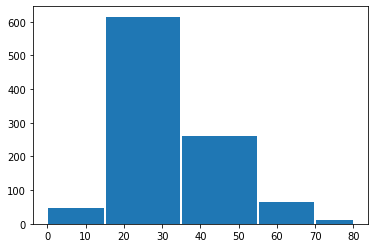

In [ ]:
plt.hist(merged_data.age, bins=[0, 15, 35, 55, 70, 80], rwidth=0.97)

plt.show()

# Second question answer

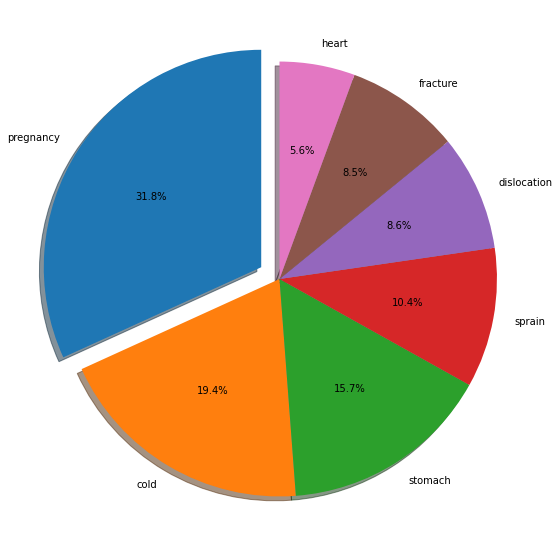

In [ ]:
labels = merged_data.diagnosis.value_counts().to_dict().keys()
data = merged_data.diagnosis.value_counts().to_list()
explode = (0.1, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

# Third question answer

In [ ]:
total_data = merged_data.pivot(columns='hospital', values='height')

In [ ]:
gen_data = total_data.general.dropna()
pren_data = total_data.prenatal.dropna()
sport_data = total_data.sports.dropna()

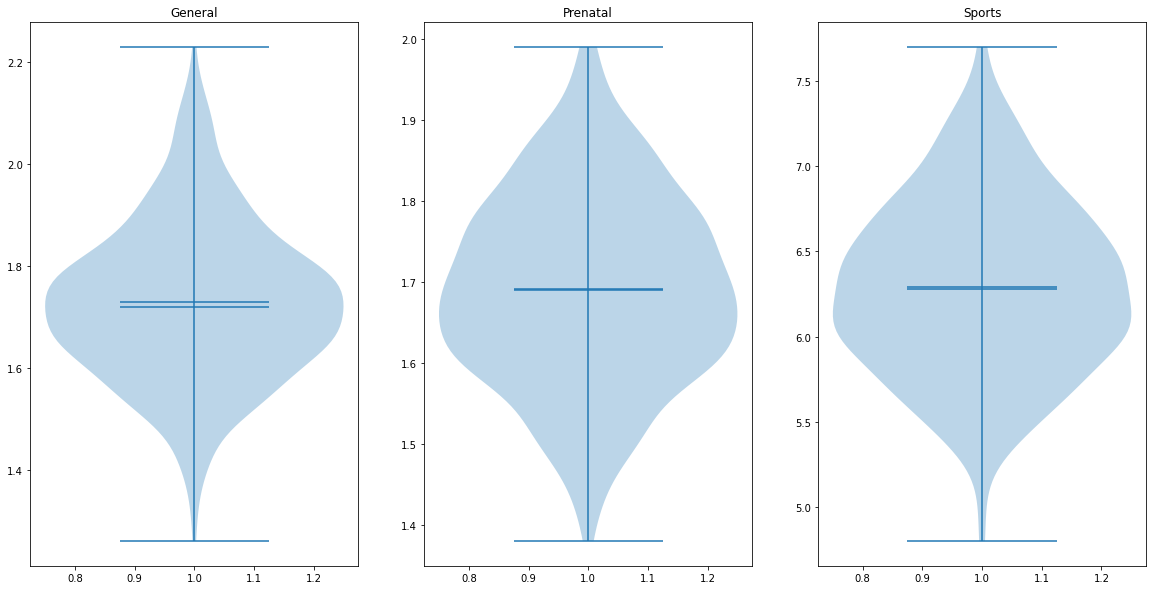

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.violinplot(gen_data, showextrema=True, showmeans=True, showmedians=True)
ax1.set_title('General')

ax2.violinplot(pren_data, showextrema=True, showmeans=True, showmedians=True)
ax2.set_title('Prenatal')

ax3.violinplot(sport_data, showextrema=True, showmeans=True, showmedians=True)
ax3.set_title('Sports')

plt.show()